In [1]:
#this is the file to play around with the timeline data stored in json format

In [2]:
%matplotlib inline
import pandas as pd
import json
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#read in json file
with open("../data/output_data/timelines/RevenantMovie.json") as infile:
    mydict=json.load(infile)

In [4]:
#create list of keys in dictionary
keylist=[i for i in mydict[0]]

In [5]:
#create the dataframe
def jsontodf(mydict):
    interestlist=['id','created_at','text','retweet_count']
    datalist=pd.DataFrame()
    for i in interestlist:
        datalist[i]=pd.Series([a[i] 
            #for littledict in mydict
                #for a in littledict])
                               for a in mydict])
    datalist['hashtags']=pd.Series([a['entities']['hashtags'] 
        #for littledict in mydict
            #for a in littledict])
                                    for a in mydict])
    return datalist

In [6]:
RevDF=jsontodf(mydict)


In [7]:
from datetime import datetime
RevDt=[datetime.strptime(i,'%a %b %d %H:%M:%S %z %Y').timetuple() for i in RevDF['created_at'].tolist()]


In [19]:
RevDt[0]

time.struct_time(tm_year=2016, tm_mon=1, tm_mday=31, tm_hour=16, tm_min=58, tm_sec=51, tm_wday=6, tm_yday=31, tm_isdst=-1)

In [28]:
wDay=pd.Series([a[6] for a in RevDt])
hourDay=pd.Series([a[3] for a in RevDt])
tcout=pd.Series([1 for a in RevDt])
heatdata=pd.DataFrame()
heatdata['day of the week']=wDay
heatdata['Hour of the day']=hourDay
heatdata['count']=tcout

In [47]:
sum((heatdata['day of the week']==1) & (heatdata['Hour of the day']==1))

1

In [69]:
heatdf=pd.DataFrame()
hour=pd.Series([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]*7)
day=pd.Series([0]*24+[1]*24+[2]*24+[3]*24+[4]*24+[5]*24+[6]*24)
heatdf['hour']=hour
heatdf['day']=day
        
        

In [88]:
heatdf['day'][167]

6

In [107]:
heatdf['count']=pd.Series(
    [sum((heatdata['day of the week']==heatdf['day'][i])&(heatdata['Hour of the day']==heatdf['hour'][i]))
     for i in range(len(heatdf))])

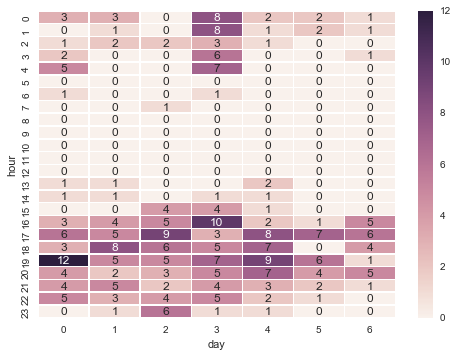

In [110]:
sns.set()

# Load the example flights dataset and conver to long-form

heatdf2 = heatdf.pivot("hour", "day", "count")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(heatdf2, annot=True, fmt="d", linewidths=.5)